In [37]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi, sqrt

## Local Stiffness and Mass Matrix Definitions

In [7]:
def local_stiffness_matrix(a,b,c,h):
    """
    This constructs the local stiffness matrix for the given problem
    """
    A1 = np.array([[1, -1], [-1, 1]])
    A2 = np.array([[2, 1], [1, 2]])
    A3 = np.array([[2, 1], [1, 2]])
    
    return (a/h)*A1 - (b/2)*A2 + (c*h/6)*A3

def local_mass_matrix(h):
    """
    This constructs the local mass matrix for the given problem
    """
    return (h/6) * np.array([[2, 1], [1, 2]]) 

## Constructing the Global System

In [8]:
def construct_system(N=4, a=1, b=0, c=0):
    """
    Construct the global mass and stiffness matrices
    for the given problem
    
    Arguments:
        N: An integer. Represents the density of the discretisation.
           Default value: 4
           
        a: A float. Corresponds to the parameter a in the equation
           Default value: 1
           
        b: A float. Corresponds to the parameter b in the equation
           Default value: 0
           
        c: A float. Corresponds to the parameter c in the equation
           Default value: 0
           
    Returns:
        A: The global stiffness matrix, dimension N x N
        M: The global mass matrix, dimension N x (N + 1)
    """
    
    # Calculate h
    h = 1/N
    
    # Get the local stiffness and mass matrices for the given problem
    A_k = local_stiffness_matrix(a, b, c, h)
    M_k = local_mass_matrix(h)
    
    # Construct the global stiffness matrix
    A = np.zeros((N-1,N-1))
    i,j = np.indices(A.shape)           # These are used to access the
                                        # diagonals
 
    A[i == j+1] = A_k[1,0]              # Subdiagonal
    A[i == j]   = A_k[1,1] + A_k[0,0]   # Main diagonal
    A[i == j-1] = A_k[0,1]              # Superdiagonal

    
    # Construct the gloal mass matrix
    M = np.zeros((N-1,N+1))
    i, j = np.indices(M.shape)          # These are used to access the 
                                        # diagonals
    
    M[i == j]   = M_k[1,0]               # Subdiagonal
    M[i == j-1] = M_k[1,1] + M_k[0,0]    # Main diagonal
    M[i == j-2] = M_k[0,1]               # Superdiagonal
    
    
    return A, M

# Solving the System

In [19]:
def solve_system(f, N=4, a=1, b=0, c=0):
    """
    Given the density N and the RHS f give the solution
    """
    
    # Discretise the domain
    xs = np.linspace(0, 1, N+1)
    
    # Approximate f
    fs = np.array([f(x) for x in xs])
    
    
    # Construct the system
    A, M = construct_system(N, a, b, c)
    
    # Construct the RHS
    M_f = np.dot(M,fs)
    
    # Solve and return
    return xs, np.linalg.solve(A, M_f)
    

## Error

In [41]:
def L2_error(u, U, N):
    """
    Given the exact solution u and our approximate solution U
    compute the error.
    """
    
    # Initially assume no error
    err = 0
    xs, h = np.linspace(0, 1, N+1, retstep=True)
    
    # Add the error at each point
    for i in range(len(U)):
        err += (u(xs[i]) - U[i])**2
        
    # Scale by the length of each subinterval and square root
    err = sqrt(h*err)
    
    return err
    

## Visualise results

In [53]:
N = 128

# Define the RHS
def f(x):
    return (pi ** 2)*sin(pi*x)

# Define the exact solution
def u(x):
    return sin(pi*x)
    
# Solve the system
xs, us = solve_system(f, N=N)

# Add the boundary points to the solution.
U = [0] + us.tolist() + [0]
print(L2_error(u,U,N))

3.5495269750295416e-05


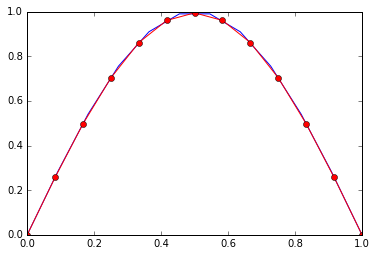

In [35]:
XS = np.linspace(0,1,12)
YS = [sin(pi*x) for x in XS]

p = plt.plot(XS, YS)
p += plt.plot(xs,u, 'r-o')